In [34]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

#tf.enable_eager_execution()

from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from scipy import misc
from generic_Transformer import Transformer

In [35]:
img_root = './sample_images/'

In [36]:
def get_filename(filename):
        base = os.path.basename(filename)
        return (os.path.splitext(base)[0])
    
    
labels = pd.read_csv('./sam.csv').values

In [37]:
param_dict = {
	    'nn_input_image_shape': (100, 100),
	    'crop_pixel': (20, 20),
	    'rotation_angles' :[25,15,12,0,-12,-15,-25],
	    'rotaion_angle_probabilities' :[0.01,0.02,0.12,0.70,0.12,0.02,0.01],
	    'flip_hor_ver_probabilities' :(0.4, 0.07),
	    'gaussian_filter_probability' : 0.04,
	    'unsharp_mask_filter_probability' : 0.04
	}


transformer = Transformer(param_dict)

In [60]:
def gen(): 
    for tup in labels:
        img = np.asarray(Image.open(img_root + tup[0] + '.jpeg'))
        label = tup[1]
        img = transformer(img)
        yield {'img':img,'label':label}
        
set = tf.data.Dataset.from_generator(gen, output_types={'img':tf.float32,'label':tf.int64})
generator = tf.data.Dataset.batch(set,2)

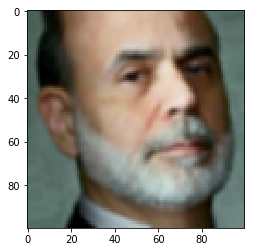

In [62]:
for bat in generator:
    a = bat['img']
    b = bat['label']
    plt.imshow(a[0])
    plt.imshow(a[1])
    break

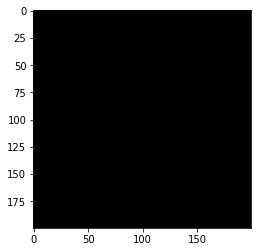

In [52]:
plt.imshow(np.zeros((200,200,3)))

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

#tf.enable_eager_execution()

from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from scipy import misc
from generic_Transformer import Transformer



class Generator(object):
    def __init__(self,img_root,csv_label_address,param_dict,transforms):
        self.img_root = img_root
        label_np = pd.read_csv(csv_label_address).values
        self.labels = label_np
        self.transforms = transforms

    def gen(self):
        for tup in self.labels:
            img = np.asarray(Image.open(self.img_root + tup[0] + '.jpeg'))
            label = tup[1]
            img = transformer(img)
            yield {'img':img,'label':label}
        


    def get_filename(self,filename):
        base = os.path.basename(filename)
        return (os.path.splitext(base)[0])

    def get_batch(self):
        set = tf.data.Dataset.from_generator(self.gen, output_types={'img':tf.float32,'label':tf.int64})
        generator = tf.data.Dataset.batch(set,2)
        return generator





param_dict = {
        'nn_input_image_shape': (100, 100),
        'crop_pixel': (20, 20),
        'rotation_angles' :[25,15,12,0,-12,-15,-25],
        'rotaion_angle_probabilities' :[0.01,0.02,0.12,0.70,0.12,0.02,0.01],
        'flip_hor_ver_probabilities' :(0.4, 0.07),
        'gaussian_filter_probability' : 0.04,
        'unsharp_mask_filter_probability' : 0.04
    }


transformer = Transformer(param_dict)

img_root_add = './sample_images/'

labels_csv = './sam.csv'

generator = Generator(img_root_add,labels_csv,param_dict,transformer)

generator = generator.get_batch()

W0611 16:33:56.551199 140034050656064 deprecation.py:323] From /home/abjb/anaconda3/lib/python3.6/site-packages/tensorflow/python/data/ops/dataset_ops.py:504: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


In [2]:
for g in generator:
    print(g['img'].shape)

(2, 100, 100, 3)
(2, 100, 100, 3)
(2, 100, 100, 3)
(2, 100, 100, 3)
